In [29]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline
from math import pi

import qiskit as q
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector

style.use("dark_background")

def do_job(circuit,type='sim',nshots=1000): 
    
    if type=='sim':
        backend = q.Aer.get_backend('qasm_simulator')
    elif type=='ibmq':
        backend = provider.get_backend("ibmq_london")
        
    circuit.measure([0,1],[0,1])
    job = q.execute(circuit, backend=backend, shots=nshots)
    
    if type=='ibmq':
        job_monitor(job)
        
    result = job.result()
    counts = result.get_counts()
    
    return counts


In [30]:
def check(counts,name):
    try:
        return counts[name]
    except:
        return 0

In [19]:
# if  type=='ibmq' : 
IBMQ.save_account('your_TOKEN_')
IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")

Credentials already present. Set overwrite=True to overwrite.


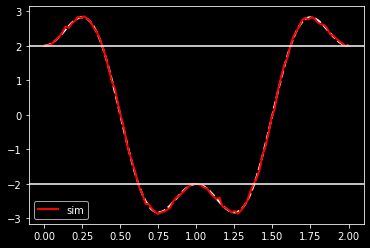

2.856 2.8284271247461903


In [31]:
theta_arr = np.linspace(0,2*pi,100)

run_type = 'sim'
nshots = 1000

cor_name_list = ['ab','a1b','ab1','a1b1']
S = []

for theta in theta_arr:
    cor = {}
    E = {}
    
    for cor_name in cor_name_list:
        circuit = q.QuantumCircuit(2,2)
        circuit.h(0)
        circuit.cx(0,1)
        
        if cor_name == 'ab':
            circuit.ry(-theta,1)           
        elif cor_name =='a1b': 
            circuit.ry(-2*theta,0)
            circuit.ry(-theta,1)
        elif cor_name == 'ab1':
            circuit.ry(-3*theta,1)
        elif cor_name == 'a1b1':
            circuit.ry(-2*theta,0)
            circuit.ry(-3*theta,1)
            
        cor[cor_name] = do_job(circuit, type = run_type, nshots=nshots)
        
        E[cor_name] = check(cor[cor_name],'11')/nshots\
        + check(cor[cor_name],'00')/nshots\
        - check(cor[cor_name],'01')/nshots\
        - check(cor[cor_name],'10')/nshots
        
    S.append(E['ab'] + E['a1b1'] + E['a1b'] - E['ab1'])
    


f = lambda x : np.cos(x) - np.cos(3*x) + np.cos(-x) + np.cos(x)
plt.plot(theta_arr/pi, f(theta_arr), '--', linewidth = 2,color = 'w' )
plt.plot(theta_arr/pi, S, linewidth = 2, color='r', label = 'sim')

plt.axhline(2)
plt.axhline(-2)
plt.legend()
plt.show()

print(max(S),np.sqrt(2)*2)
